# Loading dataset

In [1]:
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv
import numpy as np
from random import randint
from sklearn.model_selection import train_test_split

In [2]:
#mount my drive

from google.colab import drive

drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
#combining splits from Boucheron et al. (2023b) to get the full dataset in one dataframe

training_data = pd.read_csv ('Train_Data_by_AR_png_224.csv')
test_data = pd.read_csv ('Test_Data_by_AR_png_224.csv')
val_data = pd.read_csv ('Validation_Data_by_AR_png_224.csv')

full_dataset = pd.concat ([training_data, test_data, val_data], axis = 0)

full_dataset.head(100)

,filename,class
0,1069/1069_hmi.M_720s.20100505_000000_TAI.1.mag...,1
1,1069/1069_hmi.M_720s.20100505_001200_TAI.1.mag...,1
2,1069/1069_hmi.M_720s.20100505_002400_TAI.1.mag...,1
3,1069/1069_hmi.M_720s.20100505_003600_TAI.1.mag...,1
4,1069/1069_hmi.M_720s.20100505_004800_TAI.1.mag...,1
...,...,...
95,1081/1081_hmi.M_720s.20100612_112400_TAI.1.mag...,1
96,1081/1081_hmi.M_720s.20100612_113600_TAI.1.mag...,1
97,1081/1081_hmi.M_720s.20100612_114800_TAI.1.mag...,1
98,1081/1081_hmi.M_720s.20100612_120000_TAI.1.mag...,1


# Inspecting images, testing preprocessing methods on the images

## Display 6 random images with labels

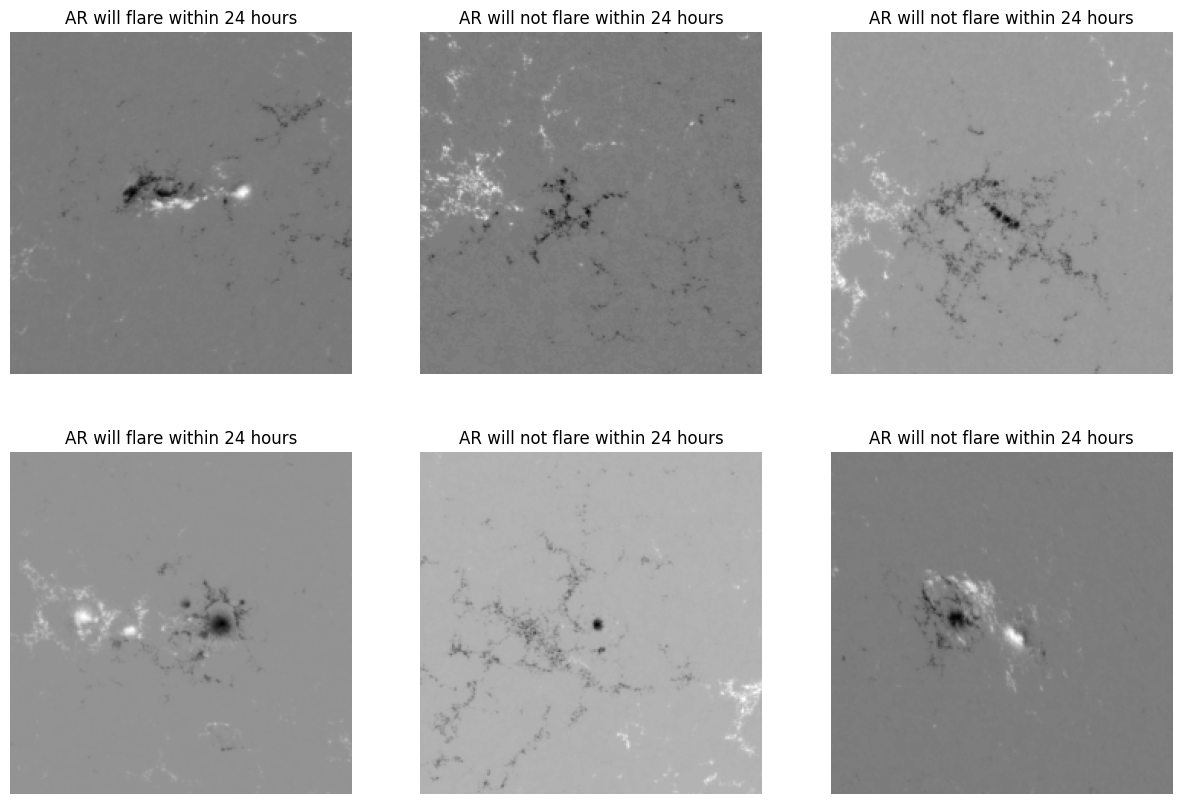

In [4]:
from skimage import io
import matplotlib.pyplot as plt

fig, axes = plt.subplots (2,3, figsize = (15,10))
sample = training_data.sample(6) #take 6 random images from the training split

axes = axes.flatten()

for i in range (6):

    file = sample['filename'].iloc[i] #get filenames from indexes 0-5 from sample
    label = sample['class'].iloc[i] #get the corresponding class of this filename
    image_path = '/content/drive/My Drive/Thesis/images_by_AR/' + file
    image = io.imread (image_path, as_gray = True)

    ax = axes[i]
    ax.imshow(image, cmap='gray') #show as grayscale, because images are shown in RGB in skimage by default
    ax.axis('off')

    if label == 1:
        ax.set_title("AR will flare within 24 hours")
    else:
        ax.set_title("AR will not flare within 24 hours")



## CLAHE examples with different clip limit

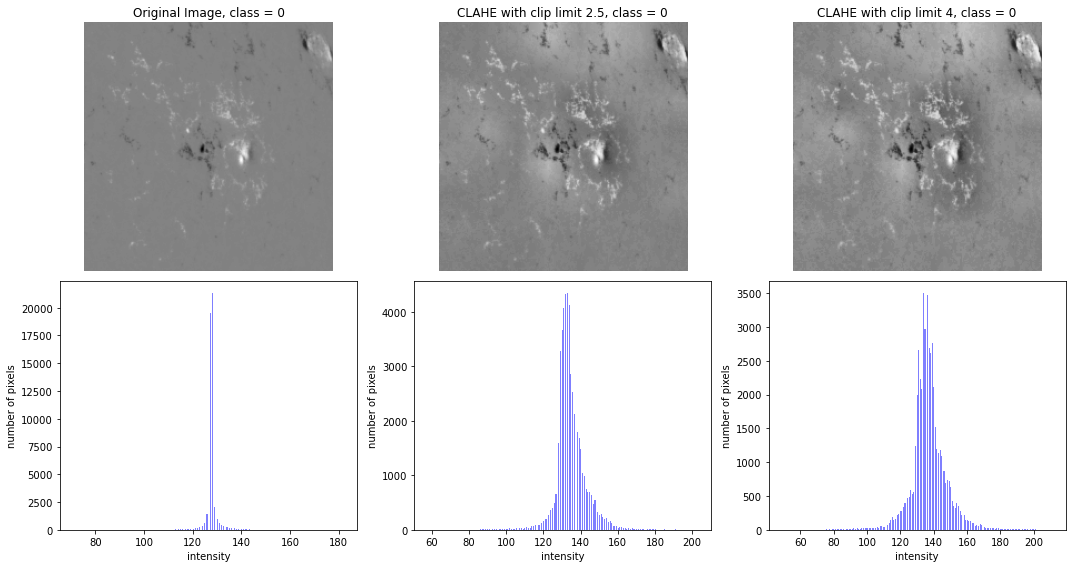

In [38]:
# APPLY CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION TO ONE OF THE IMAGES

from skimage import io
import matplotlib.pyplot as plt
import albumentations as A

#make a figure

fig, axes = plt.subplots (2,3, figsize = (15,8))


#load one random image and try the methods

for file in training_data['filename'].sample(1):

    image_class = training_data.loc[training_data['filename'] == file, 'class'].values[0]
    image_path = "images_by_AR/" + file
    image = io.imread (image_path, as_gray = True)

    #apply CLAHE with clip limit 2.5
    hist_eq_1 = A.clahe(image, clip_limit = 2.5, tile_grid_size = (8,8))

    #CLAHE with higher clip-limit (4)
    hist_eq_3 = A.clahe (image, clip_limit = 4, tile_grid_size = (8,8))

    #plot image
    axes[0,0].imshow (image, cmap = 'gray')
    axes[0,0].set_title('Original Image, class = {}'.format (str (image_class)))
    axes[0,0].axis('off')

    axes[0,1].imshow (hist_eq_1, cmap = 'gray')
    axes[0,1].set_title ('CLAHE with clip limit 2.5, class = {}'.format (str(image_class)))
    axes[0,1].axis ('off')

    axes[0,2].imshow (hist_eq_3, cmap = 'gray')
    axes[0,2].set_title ('CLAHE with clip limit 4, class = {}'.format (str(image_class)))
    axes[0,2].axis ('off')

    #plot histograms
    axes[1,0].hist(image.ravel(), alpha = 0.5, bins = 256, color = 'blue')
    axes[1,1].hist(hist_eq_1.ravel(), alpha = 0.5, bins = 256, color = 'blue')
    axes[1,2].hist(hist_eq_3.ravel(), alpha = 0.5, bins = 256, color = 'blue')

    for i in range (3):
        axes[1][i].set_ylabel ('number of pixels')
        axes[1][i].set_xlabel ('intensity')

plt.tight_layout()


## Example of median filter

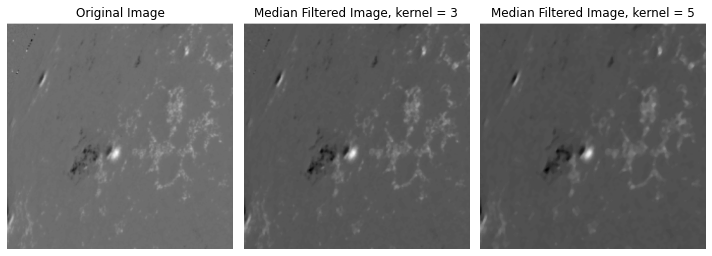

In [45]:
import cv2
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('pe.png', cv2.IMREAD_GRAYSCALE)

# Apply median filtering
median_filtered_image = cv2.medianBlur(image, 3)
median_filtered_image_2 = cv2.medianBlur(image, 5)

# Create a figure to hold the images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 3, 1)  
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')  

# Display the median-filtered image
plt.subplot(1, 3, 2) 
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered Image, kernel = 3")
plt.axis('off') 

# Display the median-filtered image
plt.subplot(1, 3, 3)  # (rows, cols, panel number)
plt.imshow(median_filtered_image_2, cmap='gray')
plt.title("Median Filtered Image, kernel = 5")
plt.axis('off')  


# Show the figure with both images
plt.tight_layout()  
plt.show()


## Class imbalance of entire dataset

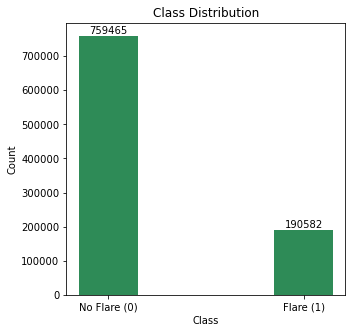

In [39]:
#CLASS IMBALANCE

import matplotlib.pyplot as plt

class_counts = full_dataset['class'].value_counts()

fig = plt.figure (figsize = (5,5))

plot_labels = ['No Flare (0)', 'Flare (1)']

color = 'seagreen'

bars = plt.bar (plot_labels, class_counts, color = color, width = 0.3, align = 'center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title ('Class Distribution')
plt.ylabel ('Count')
plt.xlabel ('Class')
plt.show()

## Inspecting ARs in entire dataset

In [3]:
#INSTANCES PER AR

active_regions = full_dataset.copy()

active_regions['AR_number'] = active_regions['filename'].apply(lambda x: x.split('/')[0][:4])

active_regions.head()

ar_counts = active_regions.groupby('AR_number').size().reset_index(name='image_count')

In [ ]:
#STATISTICS OF AR INSTANCES

mean = round (ar_counts['image_count'].mean())
sd = round (ar_counts['image_count'].std())
minimum= ar_counts['image_count'].min()
maximum = ar_counts['image_count'].max()

stats = pd.DataFrame({'Statistic': ['Mean', 'STD', 'Minimum', 'Maximum'],
                      'Value': [mean, sd, minimum, maximum]})

print ("\033[1mAR STATISTICS\033[0m")
print ()
stats

AR STATISTICS



,Statistic,Value
0,Mean,605
1,STD,316
2,Minimum,3
3,Maximum,1080


## Inspecting flare strength distributions in the full dataset

Now we will look at the flare strength per image, which was stored by the creators of this dataset in a seperate file.

In [4]:
dtypes = {
    'filename': str,
    'flare_strength': str
}

col = ['filename', 'flare_strength']

category_info = pd.read_csv ('flare_labels.txt', names = col, dtype = dtypes)

category_info.head (100)

,filename,flare_strength
0,1069_hmi.M_720s.20100505_000000_TAI.1.magnetog...,M1.2
1,1069_hmi.M_720s.20100505_001200_TAI.1.magnetog...,M1.2
2,1069_hmi.M_720s.20100505_002400_TAI.1.magnetog...,M1.2
3,1069_hmi.M_720s.20100505_003600_TAI.1.magnetog...,M1.2
4,1069_hmi.M_720s.20100505_004800_TAI.1.magnetog...,M1.2
...,...,...
95,1080_hmi.M_720s.20100611_143600_TAI.1.magnetog...,C1.0
96,1080_hmi.M_720s.20100611_144800_TAI.1.magnetog...,C1.0
97,1080_hmi.M_720s.20100611_150000_TAI.1.magnetog...,C1.0
98,1080_hmi.M_720s.20100611_151200_TAI.1.magnetog...,C1.0


To later compare the categories to another in error analysis, the classes will be added to this dataframe, and after predicting the predicted labels will be added.

In [5]:
#this dataframe is missing the prefix, which results in different filenames than the ones in full_dataset
#prefixes are added manually here

category_info['prefix'] = category_info['filename'].str[:4] + '/'

category_info['filename'] = category_info['prefix'] + category_info['filename']

category_info = category_info.drop(columns=['prefix'])

print(category_info['filename'].head())

0    1069/1069_hmi.M_720s.20100505_000000_TAI.1.mag...
1    1069/1069_hmi.M_720s.20100505_001200_TAI.1.mag...
2    1069/1069_hmi.M_720s.20100505_002400_TAI.1.mag...
3    1069/1069_hmi.M_720s.20100505_003600_TAI.1.mag...
4    1069/1069_hmi.M_720s.20100505_004800_TAI.1.mag...
Name: filename, dtype: object


In [6]:
#the indexes needed a reset
full_dataset = full_dataset.reset_index(drop=True)
full_dataset['filename'][2]

'1069/1069_hmi.M_720s.20100505_002400_TAI.1.magnetogram_224.png'

In [15]:
#see if the filenames match up after this 

common_filenames = set(full_dataset['filename']).intersection(set(category_info['filename']))
print("Common filenames count:", len(common_filenames))

Common filenames count: 950047


In [7]:
#merging so I can have access to the files, their corresponding class, and their strength
#I need this later so I can compare the strength, class and predicted class

dataset_with_cat = pd.merge (active_regions, category_info, on = 'filename', how = 'inner')

dataset_with_cat.head()

,filename,class,AR_number,flare_strength
0,1069/1069_hmi.M_720s.20100505_000000_TAI.1.mag...,1,1069,M1.2
1,1069/1069_hmi.M_720s.20100505_001200_TAI.1.mag...,1,1069,M1.2
2,1069/1069_hmi.M_720s.20100505_002400_TAI.1.mag...,1,1069,M1.2
3,1069/1069_hmi.M_720s.20100505_003600_TAI.1.mag...,1,1069,M1.2
4,1069/1069_hmi.M_720s.20100505_004800_TAI.1.mag...,1,1069,M1.2


### Making flare strength categories

In [ ]:
#all the strengths that are recorded in the dataset

dataset_with_cat['flare_strength'].unique()

array(['M1.2', 'M2.0', 'C6.1', 'C1.2', 'C1.7', 'C2.6', 'C2.4', 'C2.2',
       'C2.8', 'C3.2', 'M1.0', 'C4.4', 'C1.6', 'C5.4', 'C2.5', 'C2.0',
       'M2.9', 'C1.3', 'C2.3', 'C1.0', 'C4.7', 'C4.6', 'C1.5', 'C5.3',
       'C1.1', 'C1.4', 'M6.6', 'M2.2', 'X2.2', 'C6.6', 'C9.9', 'M1.6',
       'M1.1', 'C7.7', 'C8.5', 'C4.0', 'C3.4', 'C3.7', 'C7.5', 'M1.5',
       'C2.7', 'C5.0', 'M4.2', 'C9.1', 'C3.1', 'C1.9', 'C1.8', 'M1.8',
       'C5.5', 'C4.2', 'C3.6', 'C2.9', 'C4.8', 'C5.9', 'C7.0', 'C4.1',
       'M2.5', 'C7.1', 'C2.1', 'C3.8', 'M5.3', 'X2.1', 'X1.8', 'M6.7',
       'M2.7', 'C4.5', 'C9.3', 'C6.2', 'C9.5', 'C3.0', 'C3.9', 'X1.9',
       'M7.4', 'M3.7', 'M4.0', 'M2.6', 'C3.3', 'C6.4', 'M1.3', 'C7.6',
       'C6.3', 'C3.5', 'M1.4', 'C8.8', 'C6.0', 'M1.9', 'C4.9', 'C6.9',
       'C4.3', 'M2.3', 'C5.7', 'C8.9', 'M2.4', 'C5.1', 'M3.2', 'M8.7',
       'M2.1', 'X5.4', 'C7.2', 'M6.3', 'M8.4', 'M7.9', 'M2.8', 'C5.6',
       'C6.8', 'C8.2', 'M5.6', 'C6.5', 'M3.8', 'C9.0', 'M4.7', 'M6.1',
      

To make this a bit more readable and to be able to draw more overviewed conclusions, I will bin the strengths into categories with intervals.

These are the categories into which a flare can fall:

- C class
-- C1 - C3 (low)
-- C3.1 - C6 (moderate)
-- C6.1 - C9.9 (high)
- M class
-- M1 - M3 (low)
-- M3.1 - M6 (moderate)
-- M6.1 - M9.9 (high)
- X class
-- X flares (very strong flares)

In [8]:
def flare_bins (flare):

  if flare == '0':
    return '0'

  strength = float (flare[1:4])
  category = flare[0]

  if category == 'C':
    if strength >= 1 and strength <= 3:
      return 'C1 - C3'
    elif strength > 3 and strength <= 6:
      return 'C3.1 - C6'
    elif strength > 6:
      return 'C6.1 - C9.9'

  if category == 'M':
    if strength >= 1 and strength <= 3:
      return 'M1 - M3'
    elif strength > 3 and strength <= 6:
      return 'M3.1 - M6'
    elif strength > 6:
      return 'M6.1 - M9.9'

  if category == 'X':
    return '> X1'

In [9]:
#apply to the flare strengths in my dataframe

dataset_with_cat['flare_category'] = dataset_with_cat['flare_strength'].apply(flare_bins)

dataset_with_cat.sample(100)

,filename,class,AR_number,flare_strength,flare_category
495647,2027/2027_hmi.M_720s.20140406_043600_TAI.1.mag...,0,2027,0,0
851924,2672/2672_hmi.M_720s.20170826_232400_TAI.3.mag...,0,2672,0,0
580008,2237/2237_hmi.M_720s.20141216_221200_TAI.1.mag...,0,2237,0,0
856766,1263/1263_hmi.M_720s.20110803_191200_TAI.1.mag...,1,1263,C2.1,C1 - C3
44417,1598/1598_hmi.M_720s.20121030_143600_TAI.1.mag...,1,1598,C1.1,C1 - C3
...,...,...,...,...,...
322667,1536/1536_hmi.M_720s.20120802_222400_TAI.1.mag...,0,1536,0,0
709080,2598/2598_hmi.M_720s.20161006_194800_TAI.3.mag...,0,2598,0,0
323415,1537/1537_hmi.M_720s.20120806_173600_TAI.1.mag...,0,1537,0,0
301982,1481/1481_hmi.M_720s.20120518_222400_TAI.1.mag...,0,1481,0,0


These categories will help me have a better overview over flare strength and allows me to complete my error analysis based on the binned strengths.

### Inspect the distribution 

It is important to stratify based on these categories during splitting, to ensure that this distribution remains unharmed.

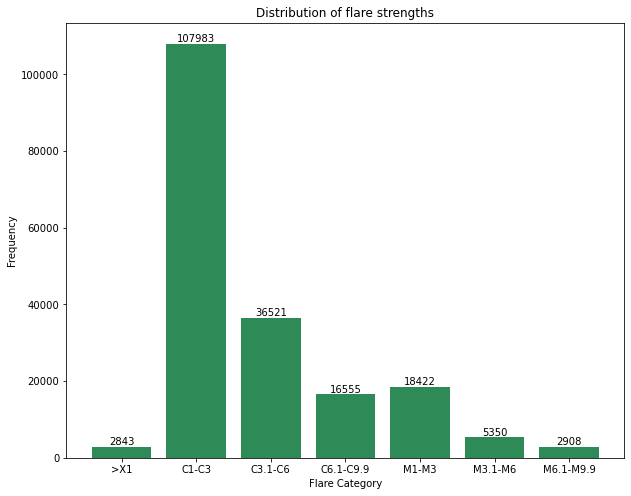

In [40]:
#plot the flares

cat_counts = dataset_with_cat.groupby(['flare_category']).count()['filename']
cat_counts = cat_counts.drop (['0']) #take out the no flares, since these obviously have no category
colors = 'seagreen'

#make figure
plt.figure (figsize= (10,8))
labels = ['>X1', 'C1-C3', 'C3.1-C6', 'C6.1-C9.9', 'M1-M3', 'M3.1-M6', 'M6.1-M9.9']

bars = plt.bar (labels, cat_counts, color = colors)

#documentation of matplotlib was used for this 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title ('Distribution of flare strengths')
plt.ylabel ('Frequency')
plt.xlabel ('Flare Category')
plt.show()

In [10]:
#shuffle by AR, and making sure that the stratification is on the flare strength, so these are well balanced in the splits

#to determine which strength is the highest
category_strength = {
    '> X1' : 7,
    'M6.1 - M9.9': 6,
    'M3.1 - M6': 5,
    'M1 - M3': 4,
    'C6.1 - C9.9': 3,
    'C3.1 - C6': 2,
    'C1 - C3': 1,
    '0': 0
}

#collect flare categories as lists
flare_categories_per_ar = dataset_with_cat.groupby('AR_number')['flare_category'].apply(list).reset_index()

#the maximum flare strength for each AR
def get_max_flare_strength(categories):
    strengths = [category_strength[category] for category in categories]
    return max(strengths)

flare_categories_per_ar['max_flare_strength'] = flare_categories_per_ar['flare_category'].apply(get_max_flare_strength)

flare_categories_per_ar = flare_categories_per_ar[['AR_number', 'max_flare_strength']]

flare_categories_per_ar.sample(100)


,AR_number,max_flare_strength
451,1553,1
1371,2523,0
1435,2589,0
938,2074,0
996,2134,1
...,...,...
161,1242,0
1558,2720,0
1508,2668,0
516,1623,0


# Dataset splitting

In [19]:
#split based on the flare strength, this will ensure that the flare categories are balanced across the train-, test and validation data

train_data, t_data = train_test_split (flare_categories_per_ar, test_size = 0.2, shuffle = True, random_state = 42, stratify = flare_categories_per_ar['max_flare_strength'])
testing_data, validation_data = train_test_split (t_data, test_size = 0.5, shuffle = True, random_state = 42, stratify = t_data['max_flare_strength'])

print ('Number of AR in the training data: {}'.format (len(train_data)))
print ('Number of AR in the test data: {}'.format (len(testing_data)))
print ('Number of AR in the validation data: {}'.format (len(validation_data)))

Number of AR in the training data: 1256
Number of AR in the test data: 157
Number of AR in the validation data: 157


In [20]:
#now get the images belonging to these ARs

ar_numbers_train = train_data['AR_number'].unique()
ar_numbers_test = testing_data['AR_number'].unique()
ar_numbers_val = validation_data['AR_number'].unique()

train_images = dataset_with_cat[dataset_with_cat['AR_number'].isin(ar_numbers_train)]
test_images = dataset_with_cat[dataset_with_cat['AR_number'].isin(ar_numbers_test)]
val_images = dataset_with_cat[dataset_with_cat['AR_number'].isin(ar_numbers_val)]

train_images

,filename,class,AR_number,flare_strength,flare_category
0,1069/1069_hmi.M_720s.20100505_000000_TAI.1.mag...,1,1069,M1.2,M1 - M3
1,1069/1069_hmi.M_720s.20100505_001200_TAI.1.mag...,1,1069,M1.2,M1 - M3
2,1069/1069_hmi.M_720s.20100505_002400_TAI.1.mag...,1,1069,M1.2,M1 - M3
3,1069/1069_hmi.M_720s.20100505_003600_TAI.1.mag...,1,1069,M1.2,M1 - M3
4,1069/1069_hmi.M_720s.20100505_004800_TAI.1.mag...,1,1069,M1.2,M1 - M3
...,...,...,...,...,...
950042,2727/2727_hmi.M_720s.20181119_080000_TAI.3.mag...,0,2727,0,0
950043,2727/2727_hmi.M_720s.20181119_081200_TAI.3.mag...,0,2727,0,0
950044,2727/2727_hmi.M_720s.20181119_082400_TAI.3.mag...,0,2727,0,0
950045,2727/2727_hmi.M_720s.20181119_083600_TAI.3.mag...,0,2727,0,0


In [ ]:
test_images

,filename,class,AR_number,flare_strength,flare_category
958,1105/1105_hmi.M_720s.20100905_150000_TAI.1.mag...,1,1105,C2.5,C1 - C3
959,1105/1105_hmi.M_720s.20100905_151200_TAI.1.mag...,1,1105,C2.5,C1 - C3
960,1105/1105_hmi.M_720s.20100905_152400_TAI.1.mag...,1,1105,C2.5,C1 - C3
961,1105/1105_hmi.M_720s.20100905_153600_TAI.1.mag...,1,1105,C2.5,C1 - C3
962,1105/1105_hmi.M_720s.20100905_154800_TAI.1.mag...,1,1105,C2.5,C1 - C3
...,...,...,...,...,...
936138,2449/2449_hmi.M_720s.20151116_150000_TAI.1.mag...,0,2449,0,0
936139,2449/2449_hmi.M_720s.20151116_151200_TAI.1.mag...,0,2449,0,0
936140,2449/2449_hmi.M_720s.20151116_152400_TAI.1.mag...,0,2449,0,0
936141,2449/2449_hmi.M_720s.20151116_153600_TAI.1.mag...,0,2449,0,0


In [ ]:
val_images

,filename,class,AR_number,flare_strength,flare_category
349,1089/1089_hmi.M_720s.20100726_043600_TAI.1.mag...,1,1089,C2.2,C1 - C3
350,1089/1089_hmi.M_720s.20100726_044800_TAI.1.mag...,1,1089,C2.2,C1 - C3
351,1089/1089_hmi.M_720s.20100726_050000_TAI.1.mag...,1,1089,C2.2,C1 - C3
352,1089/1089_hmi.M_720s.20100726_051200_TAI.1.mag...,1,1089,C2.2,C1 - C3
353,1089/1089_hmi.M_720s.20100726_052400_TAI.1.mag...,1,1089,C2.2,C1 - C3
...,...,...,...,...,...
943853,2577/2577_hmi.M_720s.20160818_230000_TAI.3.mag...,0,2577,0,0
943854,2577/2577_hmi.M_720s.20160818_231200_TAI.3.mag...,0,2577,0,0
943855,2577/2577_hmi.M_720s.20160818_232400_TAI.3.mag...,0,2577,0,0
943856,2577/2577_hmi.M_720s.20160818_233600_TAI.3.mag...,0,2577,0,0


In [21]:
#randomly shuffling the images, so model cannot learn from ordered

train_images = train_images.sample(len(train_images), random_state = 42).reset_index(drop =True)
train_images = train_images.drop(columns=['level_0', 'index'], errors='ignore')
#train_images.to_csv('train_images_flarestrength.csv', index = False)

test_images = test_images.sample (len(test_images), random_state = 42).reset_index()
test_images = test_images.drop(columns=['level_0', 'index'], errors='ignore')
#test_images.to_csv ('test_images_flarestrength.csv', index = False)

val_images = val_images.sample (len(val_images), random_state = 42).reset_index()
val_images = val_images.drop(columns=['level_0', 'index'], errors='ignore')
#val_images.to_csv('val_images_flarestrength.csv', index = False)

# Undersampling

In [3]:
#load in these previously saved splits
import pandas as pd 

train = pd.read_csv('train_images_flarestrength.csv')
test = pd.read_csv('test_images_flarestrength.csv')
val = pd.read_csv('val_images_flarestrength.csv')
test_images = pd.read_csv('test_imbalanced.csv')

len(train)
len(val)
len(test)

96700

In [6]:
from imblearn.under_sampling import RandomUnderSampler

x = train['filename'].values.reshape(-1,1)
y = train['class']

rus = RandomUnderSampler(random_state=42)

x_rs, y_rs = rus.fit_resample (x, y)

train_us = pd.DataFrame({
    'filename': x_rs.flatten(),
    'class': y_rs
})

train_us.head()

,filename,class
0,1547/1547_hmi.M_720s.20120821_093600_TAI.1.mag...,0
1,1740/1740_hmi.M_720s.20130512_192400_TAI.1.mag...,0
2,2324/2324_hmi.M_720s.20150420_021200_TAI.1.mag...,0
3,1832/1832_hmi.M_720s.20130823_061200_TAI.1.mag...,0
4,1741/1741_hmi.M_720s.20130508_214800_TAI.1.mag...,0


In [7]:
from imblearn.under_sampling import RandomUnderSampler

x = val['filename'].values.reshape(-1,1)
y = val['class']

rus = RandomUnderSampler(random_state=42)

x_rs, y_rs = rus.fit_resample (x, y)

val_us = pd.DataFrame({
    'filename': x_rs.flatten(),
    'class': y_rs
})

val_us.head()

,filename,class
0,1234/1234_hmi.M_720s.20110612_004800_TAI.1.mag...,0
1,2093/2093_hmi.M_720s.20140618_122400_TAI.1.mag...,0
2,1836/1836_hmi.M_720s.20130831_181200_TAI.1.mag...,0
3,2384/2384_hmi.M_720s.20150712_024800_TAI.1.mag...,0
4,2662/2662_hmi.M_720s.20170621_163600_TAI.3.mag...,0


In [4]:
from imblearn.under_sampling import RandomUnderSampler

x = test['filename'].values.reshape(-1,1)
y = test['class']

rus = RandomUnderSampler(random_state=42)

x_rs, y_rs = rus.fit_resample (x, y)

test_us = pd.DataFrame({
    'filename': x_rs.flatten(),
    'class': y_rs
})

test_us.head()

,filename,class
0,1671/1671_hmi.M_720s.20130219_153600_TAI.1.mag...,0
1,2125/2125_hmi.M_720s.20140803_060000_TAI.1.mag...,0
2,1275/1275_hmi.M_720s.20110830_073600_TAI.1.mag...,0
3,1279/1279_hmi.M_720s.20110831_113600_TAI.1.mag...,0
4,2375/2375_hmi.M_720s.20150703_103600_TAI.1.mag...,0


In [8]:
#add their flare strengths

train_us_fs = pd.merge (train, train_us, on = 'filename', how = 'inner')
train_us_fs = train_us_fs.drop(['class_y'], axis = 1)
train_us_fs = train_us_fs.rename(columns={'class_x': 'class'})
train_us_fs.head()

val_us_fs = pd.merge (val, val_us, on = 'filename', how = 'inner')
val_us_fs = val_us_fs.drop(['class_y'], axis = 1)
val_us_fs = val_us_fs.rename(columns={'class_x': 'class'})

test_us_fs = pd.merge (test, test_us, on = 'filename', how = 'inner')
test_us_fs = test_us_fs.drop(['class_y'], axis = 1)
test_us_fs = test_us_fs.rename(columns={'class_x': 'class'})

In [21]:
train_us_fs

,filename,class,AR_number,flare_strength,flare_category
0,2057/2057_hmi.M_720s.20140513_053600_TAI.1.mag...,0,2057,0,0
1,1689/1689_hmi.M_720s.20130311_160000_TAI.1.mag...,0,1689,0,0
2,2205/2205_hmi.M_720s.20141112_121200_TAI.1.mag...,0,2205,0,0
3,2105/2105_hmi.M_720s.20140703_043600_TAI.1.mag...,0,2105,0,0
4,1308/1308_hmi.M_720s.20111003_200000_TAI.1.mag...,0,1308,0,0
...,...,...,...,...,...
298593,1748/1748_hmi.M_720s.20130522_070000_TAI.1.mag...,0,1748,0,0
298594,2244/2244_hmi.M_720s.20141222_171200_TAI.1.mag...,1,2244,C1.4,C1 - C3
298595,2349/2349_hmi.M_720s.20150522_211200_TAI.1.mag...,1,2349,C2.0,C1 - C3
298596,2297/2297_hmi.M_720s.20150313_104800_TAI.1.mag...,1,2297,M1.3,M1 - M3


In [9]:
test_us_fs

,filename,class,AR_number,flare_strength,flare_category
0,1820/1820_hmi.M_720s.20130821_091200_TAI.1.mag...,1,1820,C4.1,C3.1 - C6
1,1902/1902_hmi.M_720s.20131117_181200_TAI.1.mag...,0,1902,0,0
2,1302/1302_hmi.M_720s.20110925_230000_TAI.1.mag...,1,1302,M4.0,M3.1 - M6
3,2125/2125_hmi.M_720s.20140728_134800_TAI.1.mag...,1,2125,C2.4,C1 - C3
4,1317/1317_hmi.M_720s.20111017_072400_TAI.1.mag...,0,1317,0,0
...,...,...,...,...,...
37591,1260/1260_hmi.M_720s.20110728_071200_TAI.1.mag...,1,1260,C5.3,C3.1 - C6
37592,1789/1789_hmi.M_720s.20130711_091200_TAI.1.mag...,0,1789,0,0
37593,1825/1825_hmi.M_720s.20130819_144800_TAI.1.mag...,1,1825,C1.0,C1 - C3
37594,1775/1775_hmi.M_720s.20130621_054800_TAI.1.mag...,1,1775,C1.3,C1 - C3


In [29]:
#save the undersampled data

train_us_fs.to_csv('train_us_fs.csv', index = False)
val_us_fs.to_csv('val_us_fs.csv', index = False)


In [71]:
test_us_fs.to_csv('test_us_fs.csv', index = False) #a balanced test set

In [67]:
test_us_fs

,filename,class,AR_number,flare_strength,flare_category
0,1820/1820_hmi.M_720s.20130821_091200_TAI.1.mag...,1,1820,C4.1,C3.1 - C6
1,1902/1902_hmi.M_720s.20131117_181200_TAI.1.mag...,0,1902,0,0
2,1302/1302_hmi.M_720s.20110925_230000_TAI.1.mag...,1,1302,M4.0,M3.1 - M6
3,2125/2125_hmi.M_720s.20140728_134800_TAI.1.mag...,1,2125,C2.4,C1 - C3
4,1317/1317_hmi.M_720s.20111017_072400_TAI.1.mag...,0,1317,0,0
...,...,...,...,...,...
37591,1260/1260_hmi.M_720s.20110728_071200_TAI.1.mag...,1,1260,C5.3,C3.1 - C6
37592,1789/1789_hmi.M_720s.20130711_091200_TAI.1.mag...,0,1789,0,0
37593,1825/1825_hmi.M_720s.20130819_144800_TAI.1.mag...,1,1825,C1.0,C1 - C3
37594,1775/1775_hmi.M_720s.20130621_054800_TAI.1.mag...,1,1775,C1.3,C1 - C3


### Taking subsets

In [11]:
from sklearn.model_selection import train_test_split

train_exp, subset_train = train_test_split(train_us_fs, test_size=0.25, stratify=train_us_fs['flare_strength'], random_state=42) #take 25% of each set
val_exp, subset_val = train_test_split(val_us_fs, test_size=0.25, stratify=val_us_fs['flare_strength'], random_state=42)

#subset_train.to_csv('train_us.csv', index = False)
#subset_val.to_csv('val_us.csv', index = False)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

subset_train = pd.read_csv ('train_us.csv')
subset_val = pd.read_csv ('val_us.csv')
test = pd.read_csv ('test_images_flarestrength.csv')


74650

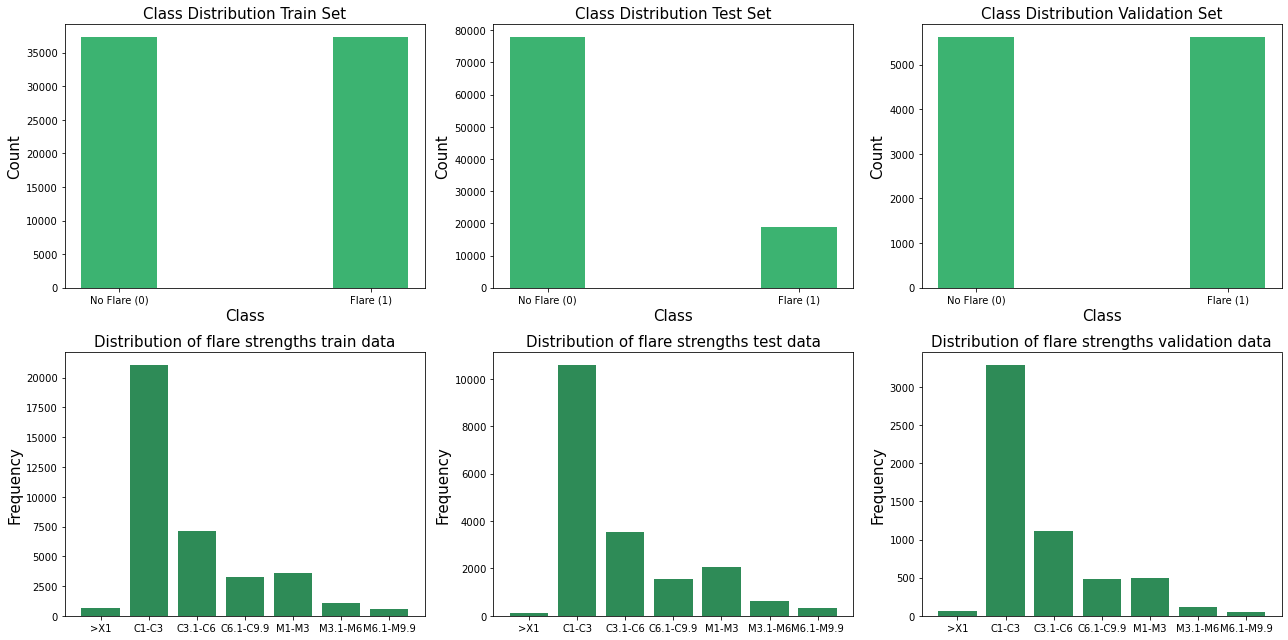

In [17]:
#see if the distributions are correct over the classes

class_train = subset_train['class'].value_counts()
class_test = test['class'].value_counts()
class_val = subset_val['class'].value_counts()

fig,axes = plt.subplots (2,3, figsize = (18,9))
plot_labels = ['No Flare (0)', 'Flare (1)']
color = 'mediumseagreen'

axes[0,0].bar (plot_labels, class_train, color = color, width = 0.3, align = 'center')
axes[0,0].set_title ('Class Distribution Train Set', fontsize = 15)
axes[0,0].set_ylabel ('Count', fontsize = 15)
axes[0,0].set_xlabel ('Class', fontsize = 15)

axes[0,1].bar (plot_labels, class_test, color = color, width = 0.3, align = 'center')
axes[0,1].set_title ('Class Distribution Test Set', fontsize = 15)
axes[0,1].set_ylabel ('Count', fontsize = 15)
axes[0,1].set_xlabel ('Class', fontsize = 15)

axes[0,2].bar (plot_labels, class_val, color = color, width = 0.3, align = 'center')
axes[0,2].set_title ('Class Distribution Validation Set', fontsize = 15)
axes[0,2].set_ylabel ('Count', fontsize = 15)
axes[0,2].set_xlabel ('Class', fontsize = 15)

cat_train = subset_train.groupby(['flare_category']).count()['filename']
cat_train = cat_train.drop (['0'])

cat_test = test.groupby(['flare_category']).count()['filename']
cat_test = cat_test.drop (['0'])

cat_val = subset_val.groupby(['flare_category']).count()['filename']
cat_val = cat_val.drop (['0'])

colors = 'seagreen'
labels = ['>X1', 'C1-C3', 'C3.1-C6', 'C6.1-C9.9', 'M1-M3', 'M3.1-M6', 'M6.1-M9.9']

axes[1,0].bar (labels, cat_train, color = colors)
axes[1,0].set_title ('Distribution of flare strengths train data', fontsize = 15)
axes[1,0].set_ylabel ('Frequency', fontsize = 15)

axes[1,1].bar (labels, cat_test, color = colors)
axes[1,1].set_title ('Distribution of flare strengths test data', fontsize = 15)
axes[1,1].set_ylabel ('Frequency', fontsize = 15)

axes[1,2].bar (labels, cat_val, color = colors)
axes[1,2].set_title ('Distribution of flare strengths validation data', fontsize = 15)
axes[1,2].set_ylabel ('Frequency', fontsize = 15)

plt.tight_layout()

In [15]:
print ('N of AR in train set: {}'.format(len(subset_train['AR_number'].unique())))
print ('N of AR in val set: {}'.format(len(subset_val['AR_number'].unique())))
print ('N of AR in balanced test set: {}'.format(len(test_us_fs['AR_number'].unique())))
print ('N of AR in imbalanced set: {}'.format(len(test['AR_number'].unique())))
print ()
print ('Number of images in the training set: {}'.format(len(subset_train)))
print ('Number of images in the undersampled test set: {}'.format(len(test_us_fs)))
print ('Number of images in the validation set: {}'.format(len(subset_val)))
print ('Number of images in the imbalanced test set: {}'.format(len(test)))

N of AR in train set: 1247
N of AR in val set: 157
N of AR in balanced test set: 157
N of AR in imbalanced set: 157

Number of images in the training set: 74650
Number of images in the undersampled test set: 37596
Number of images in the validation set: 11243
Number of images in the imbalanced test set: 96700


In [17]:
class_train = subset_train['class'].value_counts()
class_test = test['class'].value_counts()
class_val = subset_val['class'].value_counts()
class_us_test = test_us_fs['class'].value_counts()

print (class_train)
print (class_test)
print (class_val)
print (class_us_test)

0    37325
1    37325
Name: class, dtype: int64
0    77902
1    18798
Name: class, dtype: int64
1    5622
0    5621
Name: class, dtype: int64
1    18798
0    18798
Name: class, dtype: int64


# Splitting with different random seed

In [19]:
train_data, t_data = train_test_split (flare_categories_per_ar, test_size = 0.2, shuffle = True, random_state = 27, stratify = flare_categories_per_ar['max_flare_strength'])
testing_data, validation_data = train_test_split (t_data, test_size = 0.5, shuffle = True, random_state = 27, stratify = t_data['max_flare_strength'])

print ('Number of AR in the training data: {}'.format (len(train_data)))
print ('Number of AR in the test data: {}'.format (len(testing_data)))
print ('Number of AR in the validation data: {}'.format (len(validation_data)))

ar_numbers_train = train_data['AR_number'].unique()
ar_numbers_test = testing_data['AR_number'].unique()
ar_numbers_val = validation_data['AR_number'].unique()

train_images = dataset_with_cat[dataset_with_cat['AR_number'].isin(ar_numbers_train)]
test_images = dataset_with_cat[dataset_with_cat['AR_number'].isin(ar_numbers_test)]
val_images = dataset_with_cat[dataset_with_cat['AR_number'].isin(ar_numbers_val)]


#randomly shuffling the images, so model cannot learn from ordered data

train_images = train_images.sample(len(train_images), random_state = 24).reset_index(drop =True)
train_images = train_images.drop(columns=['level_0', 'index'], errors='ignore')
#train_images.to_csv('train_images_flarestrength.csv', index = False)

test_images = test_images.sample (len(test_images), random_state = 24).reset_index()
test_images = test_images.drop(columns=['level_0', 'index'], errors='ignore')
#test_images.to_csv ('test_images_flarestrength.csv', index = False)

val_images = val_images.sample (len(val_images), random_state = 24).reset_index()
val_images = val_images.drop(columns=['level_0', 'index'], errors='ignore')
#val_images.to_csv('val_images_flarestrength.csv', index = False)

Number of AR in the training data: 1256
Number of AR in the test data: 157
Number of AR in the validation data: 157


In [20]:
from imblearn.under_sampling import RandomUnderSampler

x = train_images['filename'].values.reshape(-1,1)
y = train_images['class']

rus = RandomUnderSampler(random_state=24)

x_rs, y_rs = rus.fit_resample (x, y)

train_us = pd.DataFrame({
    'filename': x_rs.flatten(),
    'class': y_rs
})

train_us.head()

x = val_images['filename'].values.reshape(-1,1)
y = val_images['class']

rus = RandomUnderSampler(random_state=24)

x_rs, y_rs = rus.fit_resample (x, y)

val_us = pd.DataFrame({
    'filename': x_rs.flatten(),
    'class': y_rs
})

val_us.head()


x = test_images['filename'].values.reshape(-1,1)
y = test_images['class']

rus = RandomUnderSampler(random_state=24)

x_rs, y_rs = rus.fit_resample (x, y)

test_us = pd.DataFrame({
    'filename': x_rs.flatten(),
    'class': y_rs
})

test_us.head()

,filename,class
0,1428/1428_hmi.M_720s.20120308_093600_TAI.1.mag...,0
1,2325/2325_hmi.M_720s.20150418_174800_TAI.1.mag...,0
2,2411/2411_hmi.M_720s.20150912_220000_TAI.1.mag...,0
3,2731/2731_hmi.M_720s.20181215_011200_TAI.3.mag...,0
4,1225/1225_hmi.M_720s.20110530_033600_TAI.1.mag...,0


In [21]:
train_us_fs = pd.merge (train_images, train_us, on = 'filename', how = 'inner')
train_us_fs = train_us_fs.drop(['class_y'], axis = 1)
train_us_fs = train_us_fs.rename(columns={'class_x': 'class'})
train_us_fs.head()

val_us_fs = pd.merge (val_images, val_us, on = 'filename', how = 'inner')
val_us_fs = val_us_fs.drop(['class_y'], axis = 1)
val_us_fs = val_us_fs.rename(columns={'class_x': 'class'})

test_us_fs = pd.merge (test_images, test_us, on = 'filename', how = 'inner')
test_us_fs = test_us_fs.drop(['class_y'], axis = 1)
test_us_fs = test_us_fs.rename(columns={'class_x': 'class'})

In [22]:
#subsets

from sklearn.model_selection import train_test_split

train_exp, subset_train = train_test_split(train_us_fs, test_size=0.25, stratify=train_us_fs['flare_category'], random_state=24) #take 25% of each set
val_exp, subset_val = train_test_split(val_us_fs, test_size=0.25, stratify=val_us_fs['flare_category'], random_state=24) 

subset_train.to_csv('train_us_2.csv', index = False)
subset_val.to_csv('val_us_2.csv', index = False)
test_images.to_csv ('test_2.csv', index = False)
test_us_fs.to_csv ('test_us_2.csv', index = False)

In [23]:
print ('N of AR in train set: {}'.format(len(subset_train['AR_number'].unique())))
print ('N of AR in val set: {}'.format(len(subset_val['AR_number'].unique())))
print ('N of AR in balanced test set: {}'.format(len(test_us_fs['AR_number'].unique())))
print ('N of AR in imbalanced set: {}'.format(len(test_images['AR_number'].unique())))
print ()
print ('Number of images in the training set: {}'.format(len(subset_train)))
print ('Number of images in the undersampled test set: {}'.format(len(test_us_fs)))
print ('Number of images in the validation set: {}'.format(len(subset_val)))
print ('Number of images in the imbalanced test set: {}'.format(len(test_images)))

N of AR in train set: 1249
N of AR in val set: 157
N of AR in balanced test set: 157
N of AR in imbalanced set: 157

Number of images in the training set: 76230
Number of images in the undersampled test set: 40358
Number of images in the validation set: 8972
Number of images in the imbalanced test set: 97923


In [ ]:
#These second sets resulted in having 7 ARs being removed instead of 9

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

test = pd.read_csv('test_images_flarestrength.csv')
test_exp, test_2 = train_test_split(test, test_size=0.25, stratify=test['flare_category'], random_state=24) #with a different random state to ensure this test set is different than the original

In [3]:
len (test_2)

24175

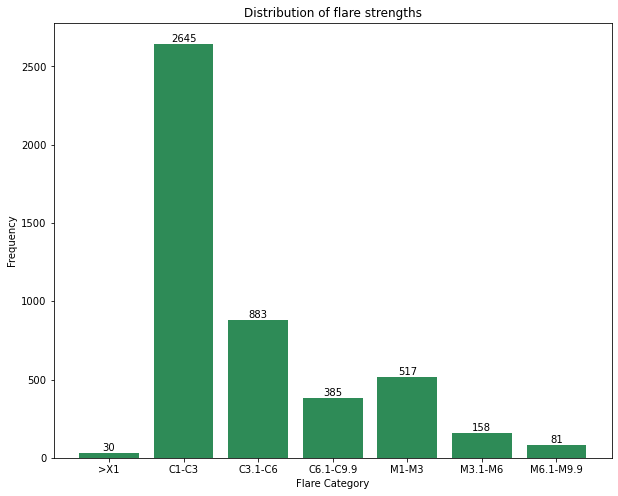

In [6]:
#plot the flares
import matplotlib.pyplot as plt

cat_counts = test_2.groupby(['flare_category']).count()['filename']
cat_counts = cat_counts.drop (['0']) #take out the no flares, since these obviously have no category
colors = 'seagreen'
#make figure
plt.figure (figsize= (10,8))
labels = ['>X1', 'C1-C3', 'C3.1-C6', 'C6.1-C9.9', 'M1-M3', 'M3.1-M6', 'M6.1-M9.9']

bars = plt.bar (labels, cat_counts, color = colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title ('Distribution of flare strengths')
plt.ylabel ('Frequency')
plt.xlabel ('Flare Category')
plt.show()

In [7]:
test_2.to_csv ('test_imb_2.csv', index = False)